<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [75]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [76]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [77]:
## Write your code here
import numpy as np
missing_values = df[["Employment", "JobSat", "RemoteWork"]].isnull().sum()
print("Missing values:")
print(missing_values)

def simplify_employment(value):
    value = value.lower()
    if 'employed, full-time' in value:
        return 'Employed, Full-Time'
    elif 'employed, part-time' in value:
        return 'Employed, Part-Time'
    elif 'student, full-time' in value:
        return 'Student, Full-Time'
    elif 'student, part-time' in value:
        return 'Student, Part-Time'
    elif 'self-employed' in value or 'freelancer' in value:
        return 'Self-Employed'
    elif 'unemployed' in value or 'not employed' in value:
        return 'Unemployed'
    elif 'retired' in value:
        return 'Retired'
    elif 'prefer not' in value:
        return 'Prefer Not to Say'
    else:
        return 'Other'
df["Employment"] = df["Employment"].apply(simplify_employment)

value_counts1 = df["JobSat"].value_counts(normalize=True)
values1 = value_counts1.index.to_list()
probs1 = value_counts1.values
missing_JobSat = df["JobSat"].isnull().sum()
imputed_values1 = np.random.choice(values1, size=missing_JobSat, p=probs1)
df.loc[df["JobSat"].isnull(), "JobSat"] = imputed_values1

value_counts2 = df['RemoteWork'].value_counts(normalize=True)
values2 = value_counts2.index.to_list()
probs2 = value_counts2.values
missing_RemoteWork = df["RemoteWork"].isnull().sum()
imputed_values2 = np.random.choice(values2, size=missing_RemoteWork, p=probs2)
df.loc[df["RemoteWork"].isnull(), "RemoteWork"] = imputed_values2

print("\nMissing values after imputation:")
print(df[["Employment", "JobSat", "RemoteWork"]].isnull().sum())

Missing values:
Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after imputation:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


Missing values: 13827
Median: 7.0
Missing values after imputation: 0

  ExperienceRange  JobSat
0       0–5 years     7.0
1      5–10 years     7.0
2     10–20 years     7.0
3       20+ years     8.0


/tmp/ipykernel_300/156971774.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_range = df.groupby("ExperienceRange")["JobSat"].median().reset_index()
/tmp/ipykernel_300/156971774.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_jobsat_by_range, x="ExperienceRange", y="JobSat", palette="Blues_d")


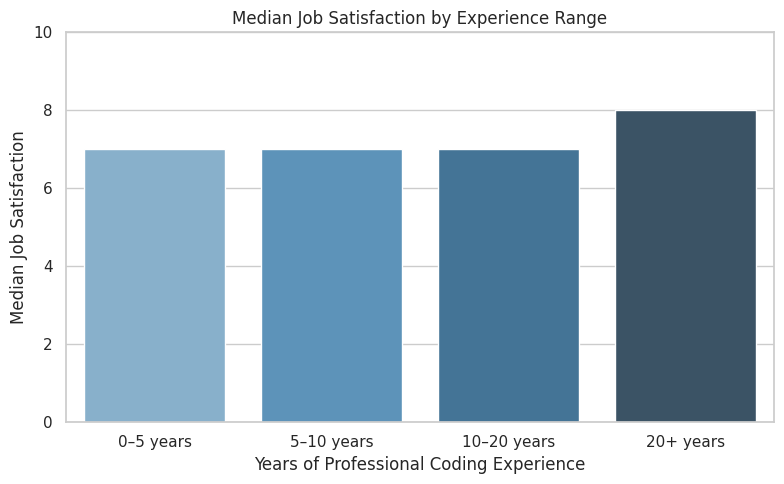

In [78]:
## Write your code here
df["YearsCodePro"] = df["YearsCodePro"].replace({
    'Less than 1 year': 0,
    'More than 50 years': 51
})

df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

missing_years = df["YearsCodePro"].isnull().sum()
print("Missing values:", missing_years)
median_years = df["YearsCodePro"].median()
print("Median:", median_years)
df["YearsCodePro"] = df["YearsCodePro"].fillna(median_years)
print("Missing values after imputation:", df["YearsCodePro"].isnull().sum())

print()

bins = [0, 5, 10, 20, np.inf]
labels = ["0–5 years", "5–10 years", "10–20 years", "20+ years"]

df["ExperienceRange"] = pd.cut(df["YearsCodePro"], bins=bins, labels=labels, right=False)

median_jobsat_by_range = df.groupby("ExperienceRange")["JobSat"].median().reset_index()
print(median_jobsat_by_range)

plt.figure(figsize=(8, 5))
sns.barplot(data=median_jobsat_by_range, x="ExperienceRange", y="JobSat", palette="Blues_d")
plt.title("Median Job Satisfaction by Experience Range")
plt.ylabel("Median Job Satisfaction")
plt.xlabel("Years of Professional Coding Experience")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/1879946884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="JobSat", palette="viridis", order=sorted(df["JobSat"].dropna().unique()))


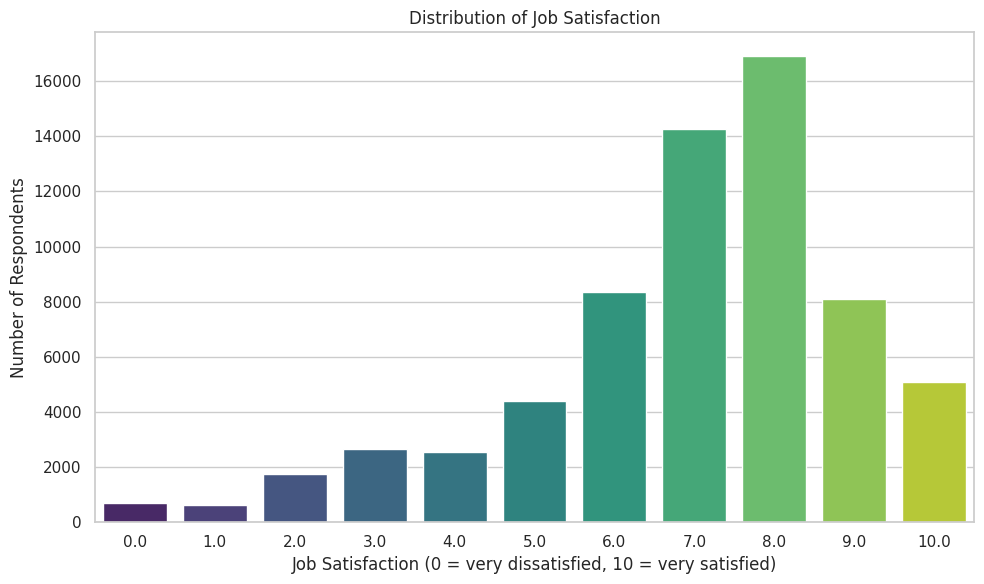

In [79]:
## Write your code here
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="JobSat", palette="viridis", order=sorted(df["JobSat"].dropna().unique()))

plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction (0 = very dissatisfied, 10 = very satisfied)")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


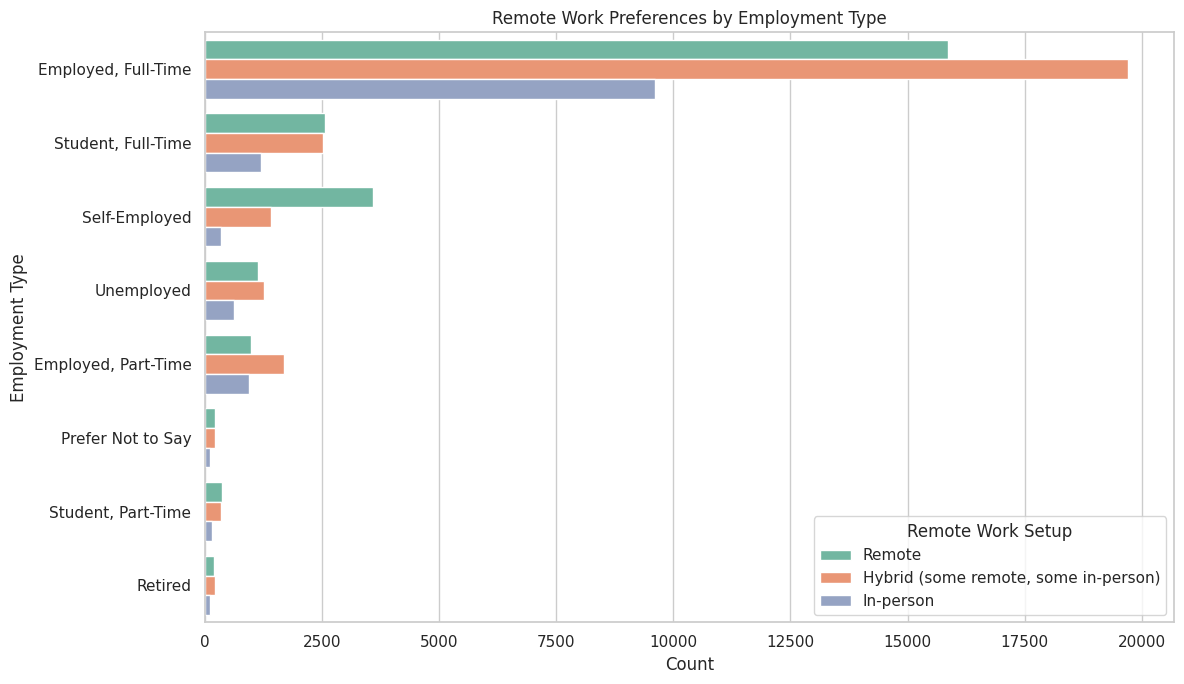

RemoteWork           Hybrid (some remote, some in-person)  In-person  Remote
Employment                                                                  
Employed, Full-Time                                 19698       9605   15859
Employed, Part-Time                                  1702        942     995
Prefer Not to Say                                     223        109     214
Retired                                               213        112     200
Self-Employed                                        1417        354    3592
Student, Full-Time                                   2527       1197    2561
Student, Part-Time                                    353        157     371
Unemployed                                           1266        629    1141


In [80]:
## Write your code here
plt.figure(figsize=(12, 7))
sns.countplot(
    data=df,
    y='Employment',  
    hue='RemoteWork',
    palette='Set2'
)
plt.title('Remote Work Preferences by Employment Type')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.legend(title='Remote Work Setup')
plt.tight_layout()
plt.show()

remote_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remote_employment_ct)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_300/4005397757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')


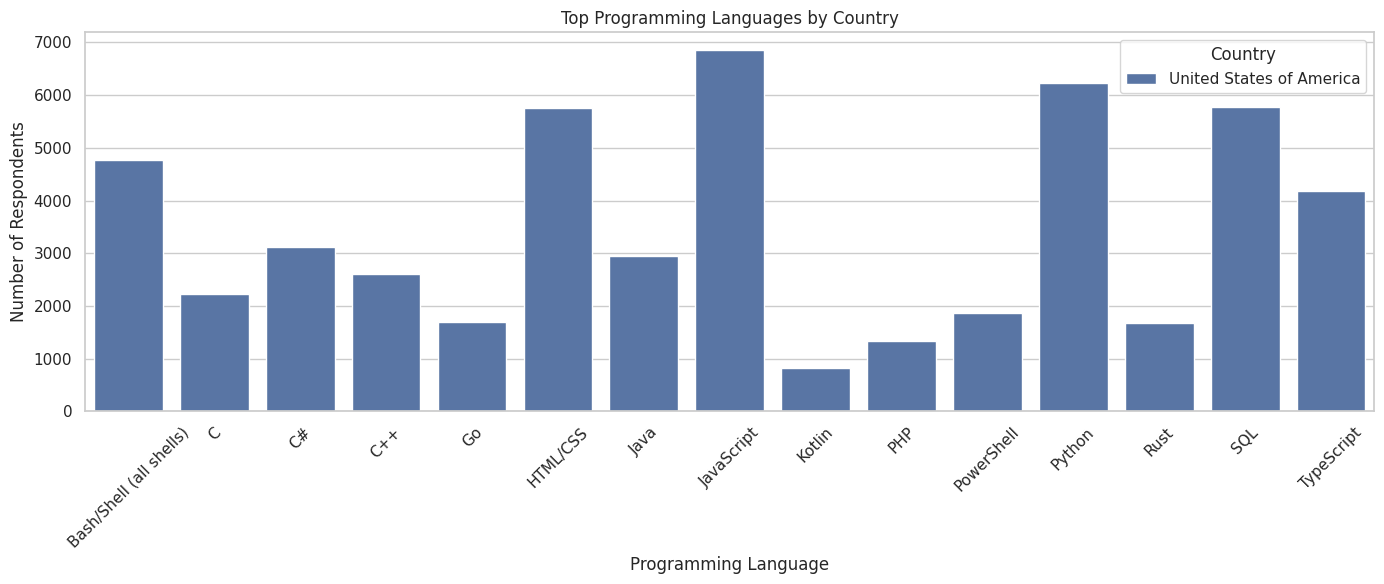

In [90]:
## Write your code here
df_lang = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

target_countries = ["United States of America"]
df_filtered = df_lang[df_lang['Country'].isin(target_countries)]
lang_counts = df_filtered.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')
lang_pivot = lang_counts.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Count').fillna(0)
top_langs = df_lang['LanguageHaveWorkedWith'].value_counts().head(15).index
lang_pivot = lang_pivot.loc[lang_pivot.index.isin(top_langs)]

plt.figure(figsize=(14, 6))
sns.barplot(data=lang_counts[lang_counts['LanguageHaveWorkedWith'].isin(top_langs)],
            x='LanguageHaveWorkedWith', y='Count', hue='Country')
plt.title('Top Programming Languages by Country')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


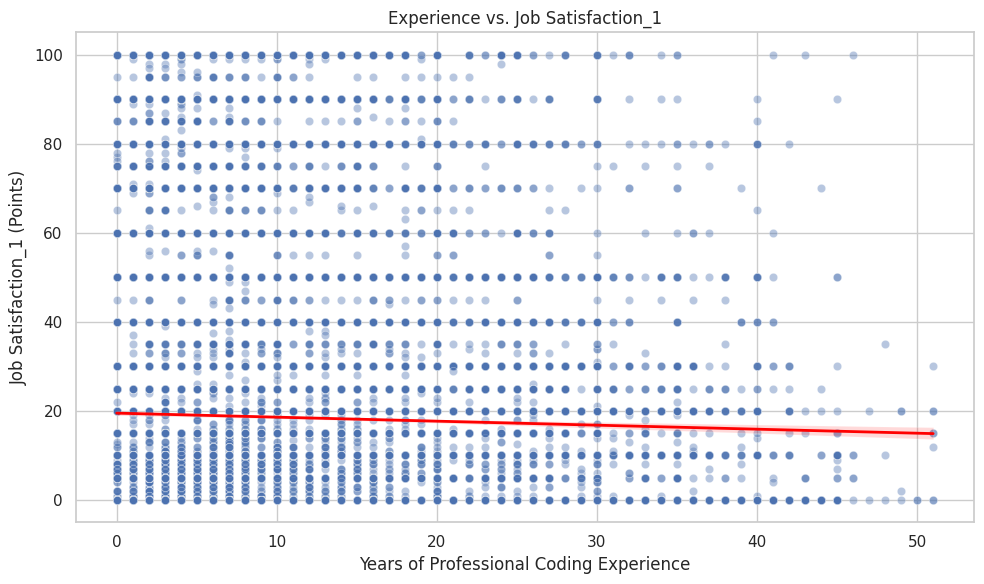

In [100]:
## Write your code here
df_scatter = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scatter, x='YearsCodePro', y='JobSatPoints_1', alpha=0.4)

sns.regplot(data=df_scatter, x='YearsCodePro', y='JobSatPoints_1',
            scatter=False, color='red', line_kws={"linewidth": 2})

plt.title('Experience vs. Job Satisfaction_1')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction_1 (Points)')
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, Full-Time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1260   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      19136   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   12489   
Primary/elementary school                                           201   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2312   
Secondary school (e.g. American high school, Ge...                 1860   
Some college/university study without earning a...                 4494   
Something else                                                      448   

Employment                                          Employed, Part-Time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 112   
Bachelor’s degree (B.A.,

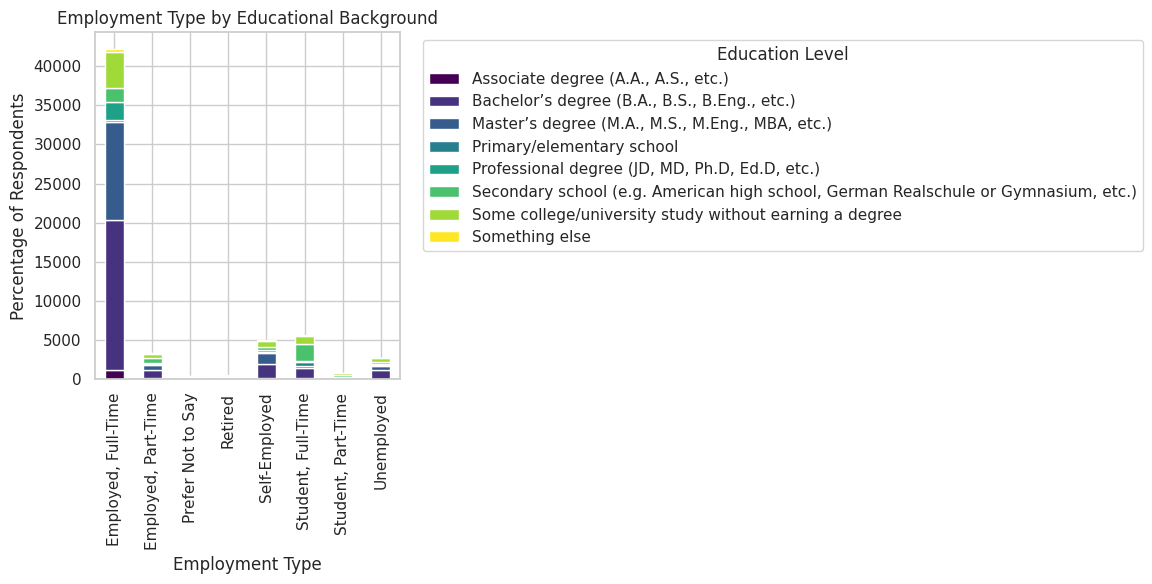

In [113]:
## Write your code here
df[['EdLevel', 'Employment']].dropna().sample(5)
edu_employment_ct = pd.crosstab(df['EdLevel'], df['Employment'])
print(edu_employment_ct)

edu_employment_ct.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.title('Employment Type by Educational Background')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Employment Type')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [115]:
## Write your code here
df.to_csv("cleaned_survey_data.csv", index=False)
print("Dataset saved successfully!")

Dataset saved successfully!


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
